In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/MedMNIST"


In [ ]:
import os
os.chdir("/content/drive/MyDrive/MedMNIST")


In [ ]:
!apt-get install -y git
!git clone https://github.com/MedMNIST/MedMNIST.git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Cloning into 'MedMNIST'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 418 (delta 66), reused 75 (delta 54), pack-reused 320
Receiving objects: 100% (418/418), 8.16 MiB | 12.71 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [ ]:
!cp /content/drive/MyDrive/MedMNIST/MedMNIST/examples/dataset_without_pytorch.py "/content/drive/MyDrive/MedMNIST"


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul 18 14:54:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=7b9b390cecd2ac0f76fb34e622c8d46c1fcf7207c4376eeee8282998641521c2
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [2]:
%cd /content/drive/MyDrive/MedMNIST

/content/drive/MyDrive/MedMNIST


In [4]:
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

In [5]:
from tqdm import tqdm
import numpy as np

import medmnist
from medmnist import INFO, Evaluator

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

data_flag = 'bloodmnist'

download = True


BATCH_SIZE = 128


info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(dataset_without_pytorch, info['python_class'])

MedMNIST v2.2.2 @ https://github.com/MedMNIST/MedMNIST/


In [6]:
BATCH_SIZE = 128
# load the data
train_dataset = DataClass(split='train', download=download)
test_dataset = DataClass(split='test', download=download)
validation_dataset = DataClass(split='val', download=download)

train_loader = get_loader(dataset=train_dataset, batch_size=BATCH_SIZE)
test_loader = get_loader(dataset=test_dataset, batch_size=BATCH_SIZE)
val_loader = get_loader(dataset=validation_dataset, batch_size=BATCH_SIZE)

100%|██████████| 35461855/35461855 [00:02<00:00, 15384741.13it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [7]:
train_dataset

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC BY 4.0

In [ ]:
train_images=train_dataset.imgs
train_labels=train_dataset.labels
val_images=validation_dataset.imgs
val_labels=validation_dataset.labels
test_images=test_dataset.imgs
test_labels=test_dataset.labels

In [ ]:
import os
import cv2

# Specify the path to the folder where images will be stored
save_folder = "/content/drive/MyDrive/MedMNIST/train_bloodMNIST_resize_32"

# Create the save folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Iterate over the training images and labels
for i, (image, label) in enumerate(zip(train_images, train_labels)):
    # Create the label subfolder if it doesn't exist
    label_folder = os.path.join(save_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)

    # Resize the image to 32x32 pixels
    resized_image = cv2.resize(image, (32, 32))

    # Convert the image to RGB if it's not already
    if resized_image.shape[-1] == 1:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    # Save the image in the corresponding label subfolder
    image_path = os.path.join(label_folder, f"image_{i}.png")
    cv2.imwrite(image_path, resized_image)


In [ ]:
import os
import cv2
import numpy as np

# Specify the path to the folder containing the resized images
folder_path = "/content/drive/MyDrive/MedMNIST/train_bloodMNIST_resize_32"

# Create empty lists to store the resized images and labels
resized_images = []
labels = []
train_images = None
train_labels = None

# Function to load and process the images
def load_images():
    global train_images, train_labels  # Declare the variables as global

    # Iterate over the subfolders and collect the resized images and labels
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            subfolder_images = [cv2.imread(os.path.join(subfolder_path, file)) for file in os.listdir(subfolder_path)]
            resized_images.extend(subfolder_images)
            label = int(subfolder.strip("[]"))  # Remove square brackets and convert to int
            labels.extend([label] * len(subfolder_images))

    # Convert the lists to NumPy arrays
    train_images = np.array(resized_images)
    train_labels = np.array(labels)

# Call the function to load and process the images
load_images()

# Verify the shapes of the train_images and train_labels arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)


Train images shape: (11959, 32, 32, 3)
Train labels shape: (11959,)


In [ ]:
from keras.utils import np_utils

# Perform one-hot encoding on the labels
train_labels = np_utils.to_categorical(train_labels, 8)

In [ ]:
import os
import cv2

# Specify the path to the folder where images will be stored
save_folder = "/content/drive/MyDrive/MedMNIST/val_bloodMNIST_resize_32"

# Create the save folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Iterate over the training images and labels
for i, (image, label) in enumerate(zip(val_images, val_labels)):
    # Create the label subfolder if it doesn't exist
    label_folder = os.path.join(save_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)

    # Resize the image to 32x32 pixels
    resized_image = cv2.resize(image, (32, 32))

    # Convert the image to RGB if it's not already
    if resized_image.shape[-1] == 1:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    # Save the image in the corresponding label subfolder
    image_path = os.path.join(label_folder, f"image_{i}.png")
    cv2.imwrite(image_path, resized_image)


In [ ]:
import os
import cv2
import numpy as np

# Specify the path to the folder containing the resized images
folder_path = "/content/drive/MyDrive/MedMNIST/val_bloodMNIST_resize_32"

# Create empty lists to store the resized images and labels
resized_images = []
labels = []
val_images = None
val_labels = None

# Function to load and process the images
def load_images():
    global val_images, val_labels  # Declare the variables as global

    # Iterate over the subfolders and collect the resized images and labels
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            subfolder_images = [cv2.imread(os.path.join(subfolder_path, file)) for file in os.listdir(subfolder_path)]
            resized_images.extend(subfolder_images)
            label = int(subfolder.strip("[]"))  # Remove square brackets and convert to int
            labels.extend([label] * len(subfolder_images))

    # Convert the lists to NumPy arrays
    val_images = np.array(resized_images)
    val_labels = np.array(labels)

# Call the function to load and process the images
load_images()

# Verify the shapes of the train_images and train_labels arrays
print("Val images shape:", val_images.shape)
print("Val labels shape:", val_labels.shape)


Val images shape: (1712, 32, 32, 3)
Val labels shape: (1712,)


In [ ]:
from keras.utils import np_utils

# Perform one-hot encoding on the labels
val_labels = np_utils.to_categorical(val_labels, 8)

In [ ]:
import os
import cv2

# Specify the path to the folder where images will be stored
save_folder = "/content/drive/MyDrive/MedMNIST/test_bloodMNIST_resize_32"

# Create the save folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Iterate over the training images and labels
for i, (image, label) in enumerate(zip(test_images, test_labels)):
    # Create the label subfolder if it doesn't exist
    label_folder = os.path.join(save_folder, str(label))
    os.makedirs(label_folder, exist_ok=True)

    # Resize the image to 32x32 pixels
    resized_image = cv2.resize(image, (32, 32))

    # Convert the image to RGB if it's not already
    if resized_image.shape[-1] == 1:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

    # Save the image in the corresponding label subfolder
    image_path = os.path.join(label_folder, f"image_{i}.png")
    cv2.imwrite(image_path, resized_image)


In [ ]:
import os
import cv2
import numpy as np

# Specify the path to the folder containing the resized images
folder_path = "/content/drive/MyDrive/MedMNIST/test_bloodMNIST_resize_32"

# Create empty lists to store the resized images and labels
resized_images = []
labels = []
val_images = None
val_labels = None

# Function to load and process the images
def load_images():
    global test_images, test_labels  # Declare the variables as global

    # Iterate over the subfolders and collect the resized images and labels
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            subfolder_images = [cv2.imread(os.path.join(subfolder_path, file)) for file in os.listdir(subfolder_path)]
            resized_images.extend(subfolder_images)
            label = int(subfolder.strip("[]"))  # Remove square brackets and convert to int
            labels.extend([label] * len(subfolder_images))

    # Convert the lists to NumPy arrays
    test_images = np.array(resized_images)
    test_labels = np.array(labels)

# Call the function to load and process the images
load_images()

# Verify the shapes of the train_images and train_labels arrays
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Test images shape: (3421, 32, 32, 3)
Test labels shape: (3421,)


In [ ]:
from keras.utils import np_utils

# Perform one-hot encoding on the labels
test_labels = np_utils.to_categorical(test_labels, 8)

In [ ]:
# Verify the shapes of the train_images and train_labels arrays
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
# Verify the shapes of the train_images and train_labels arrays
print("Val images shape:", val_images.shape)
print("Val labels shape:", val_labels.shape)
# Verify the shapes of the train_images and train_labels arrays
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (11959, 32, 32, 3)
Train labels shape: (11959, 8)
Val images shape: (1712, 32, 32, 3)
Val labels shape: (1712, 8)
Test images shape: (3421, 32, 32, 3)
Test labels shape: (3421, 8)


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

import keras
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential

import os

import matplotlib.pyplot as plt

import random

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
from keras.applications import DenseNet121
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from PIL import Image


densenet=DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
)

def build_densenet():
  model=Sequential()
  model.add(densenet)
  model.add(data_augmentation)
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Flatten())
  model.add(Dense(16,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Flatten())

  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(8,activation='sigmoid'))

  model.compile(
      loss='categorical_crossentropy',
      optimizer=Adam(learning_rate=1e-4),
      metrics=['accuracy']
  )

  return model


29084464/29084464 [==============================] - 0s 0us/step


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 sequential (Sequential)     (None, 1, 1, 1024)        0         
                                                                 
 dense_5 (Dense)             (None, 1, 1, 64)          65600     
                                                                 
 dense_6 (Dense)             (None, 1, 1, 32)          2080      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                

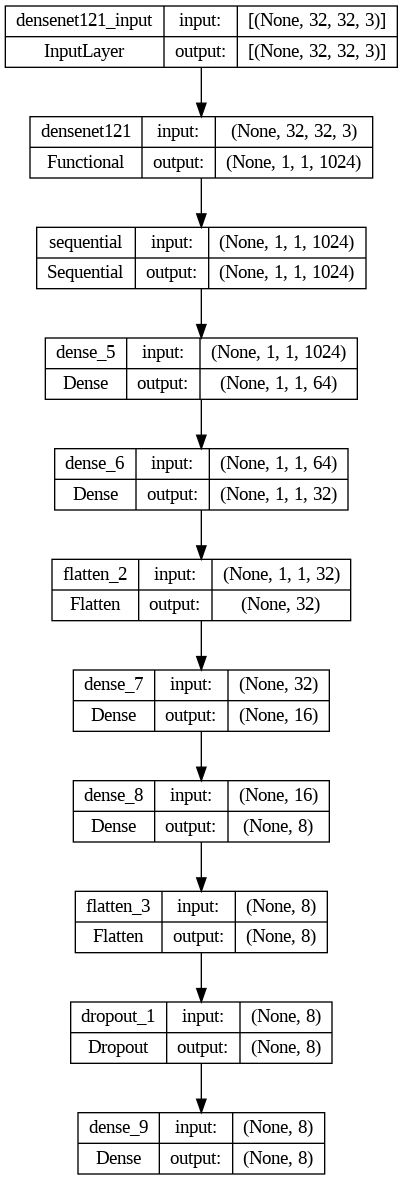

In [ ]:
from tensorflow.keras.utils import plot_model
model=build_densenet()
model.summary()
plot_model(model, to_file='model1_diagram.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, shuffle=True,validation_data=(val_images,val_labels))


Epoch 1/100
374/374 [==============================] - 134s 110ms/step - loss: 1.7786 - accuracy: 0.2583 - val_loss: 1.2337 - val_accuracy: 0.4731
Epoch 2/100
374/374 [==============================] - 33s 90ms/step - loss: 1.4317 - accuracy: 0.3679 - val_loss: 1.1947 - val_accuracy: 0.5789
Epoch 3/100
374/374 [==============================] - 36s 97ms/step - loss: 1.2647 - accuracy: 0.4306 - val_loss: 0.8078 - val_accuracy: 0.7185
Epoch 4/100
374/374 [==============================] - 36s 96ms/step - loss: 1.1438 - accuracy: 0.5041 - val_loss: 0.7362 - val_accuracy: 0.7477
Epoch 5/100
374/374 [==============================] - 32s 86ms/step - loss: 1.0521 - accuracy: 0.5613 - val_loss: 0.6469 - val_accuracy: 0.8037
Epoch 6/100
374/374 [==============================] - 34s 90ms/step - loss: 0.9908 - accuracy: 0.6169 - val_loss: 0.5872 - val_accuracy: 0.8616
Epoch 7/100
374/374 [==============================] - 32s 86ms/step - loss: 0.9447 - accuracy: 0.6686 - val_loss: 0.5926 - val_

In [ ]:
model.save('model1.h5')

1/1 [==============================] - 0s 34ms/step


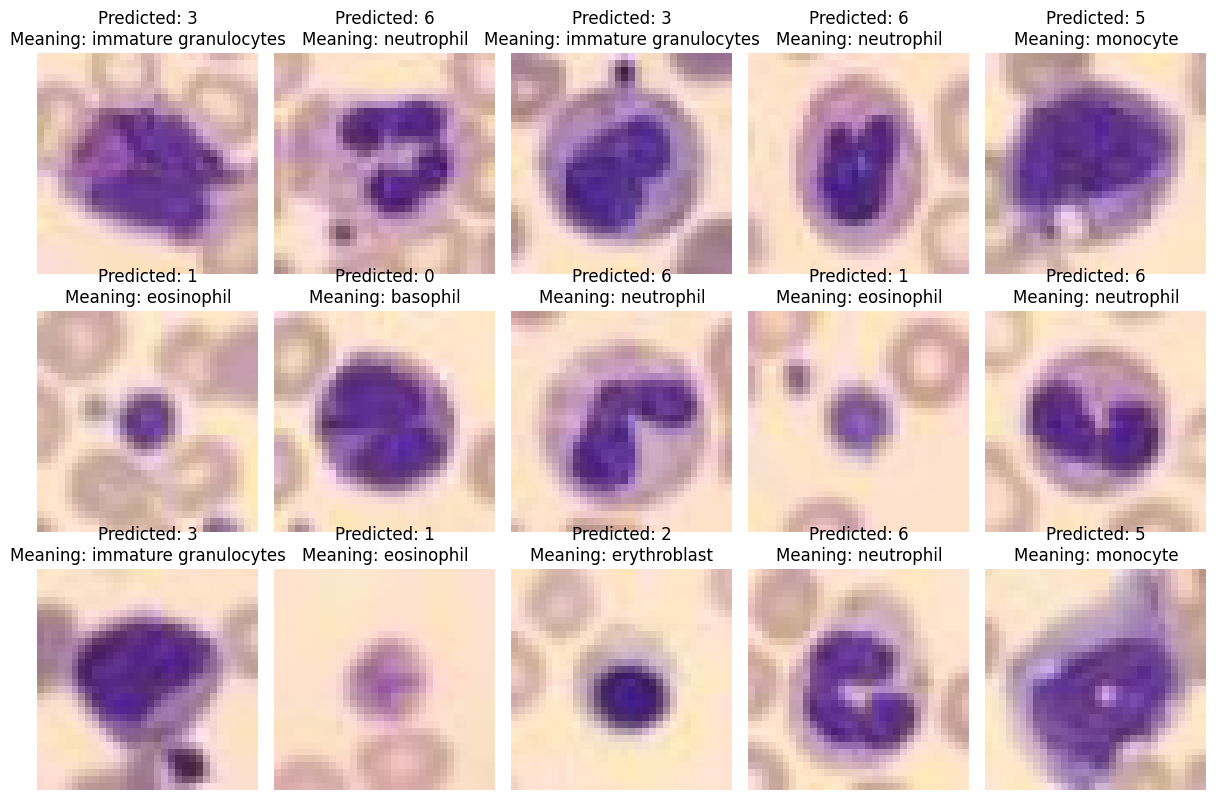

In [ ]:
import random

# Select 15 random indices from the test dataset
random_indices = random.sample(range(len(test_images)), k=15)

# Select the corresponding images and labels
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# Predict the labels for the selected images
# Load the saved model
model = keras.models.load_model('/content/drive/MyDrive/MedMNIST/model1.h5')

# Predict the labels for the selected images
predictions = model.predict(selected_images)

predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define the label meanings dictionary
label_meanings = {
    '0': 'basophil',
    '1': 'eosinophil',
    '2': 'erythroblast',
    '3': 'immature granulocytes',
    '4': 'lymphocyte',
    '5': 'monocyte',
    '6': 'neutrophil',
    '7': 'platelet'
}

# Match the predicted labels with their respective label meanings
predicted_label_meanings = [label_meanings[str(label)] for label in predicted_labels]

# Display the selected images along with their predicted labels and label meanings
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_labels[i]}\nMeaning: {predicted_label_meanings[i]}")
plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.5 MB/s eta 0:00:00


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/MedMNIST/model1.h5')
classes = ['basophil','eosinophil','erythroblast','immature granulocytes','lymphocyte','monocyte','neutrophil','platelet']

